#### Baseed on https://www.curiousily.com/posts/deploy-keras-deep-learning-project-to-production-with-flask/

In [4]:
!python3 -m pip install pandas --user --upgrade setuptools
!python3 -m pip install --upgrade pip --user
!python3 -m pip install gdown --user
!python3 -m pip install pandas --user
!python3 -m pip install tensorflow --user
#!python3 -m pip install tensorflow-gpu --user
!python3 -m pip install seaborn --user
!python3 -m pip install sklearn --user

Requirement already up-to-date: pandas in /home/animeshs/.local/lib/python3.5/site-packages (0.24.2)
Requirement already up-to-date: setuptools in /home/animeshs/.local/lib/python3.5/site-packages (45.3.0)
Requirement already up-to-date: pip in /home/animeshs/.local/lib/python3.5/site-packages (20.0.2)


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
import joblib
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 8, 6
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

#### Data: DeepImpute: an accurate and efficient deep learning method for single-cell RNA-seq data imputation [https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1837-6]

In [6]:
#!gdown --id 1aRXGcJlIkuC6uj1iLqzi9DQQS-3GPwM_ --output airbnb_nyc.csv
!wget https://raw.githubusercontent.com/lanagarmire/deepimpute/master/examples/test.csv  -O na.csv

na.csv: Device or resource busy


In [7]:
df = pd.read_csv('na.csv')

# Exploration

In [8]:
df.shape

(500, 3001)

In [10]:
df.columns

Index(['Unnamed: 0', 'ENSG00000177954', 'ENSG00000197756', 'ENSG00000231500',
       'ENSG00000140988', 'ENSG00000105372', 'ENSG00000198712',
       'ENSG00000109475', 'ENSG00000112306', 'ENSG00000137818',
       ...
       'ENSG00000269858', 'ENSG00000182087', 'ENSG00000160214',
       'ENSG00000166411', 'ENSG00000186153', 'ENSG00000089351',
       'ENSG00000108433', 'ENSG00000206053', 'ENSG00000137806',
       'ENSG00000197766'],
      dtype='object', length=3001)

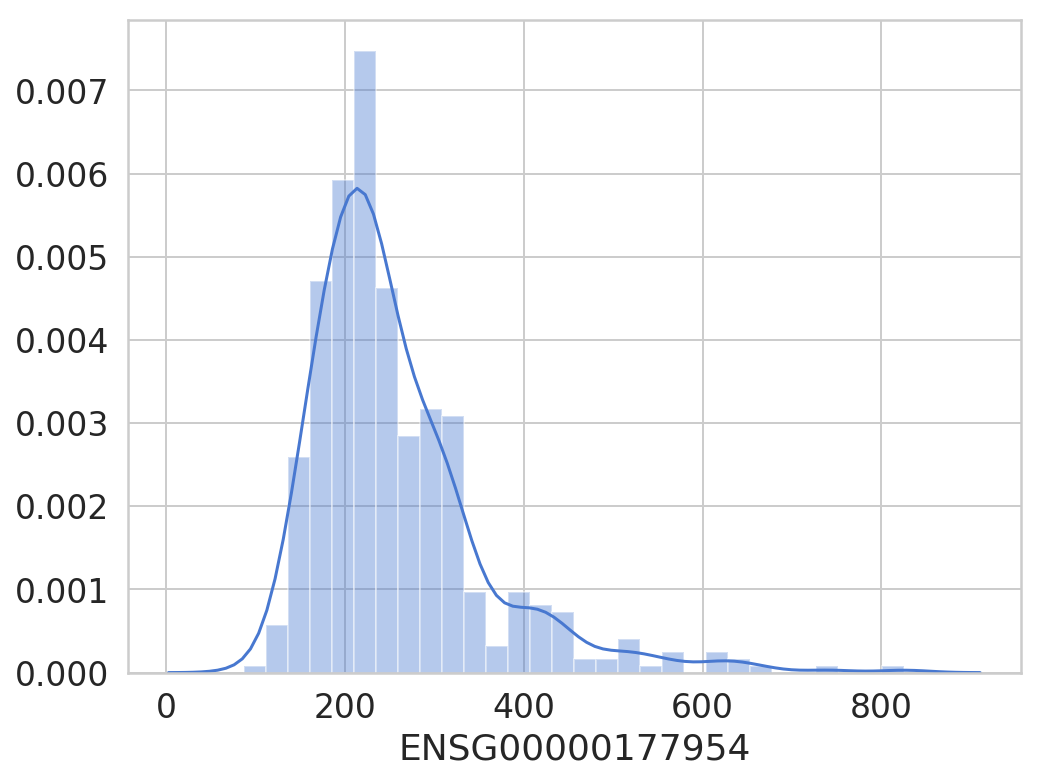

In [13]:
sns.distplot(df.ENSG00000177954);

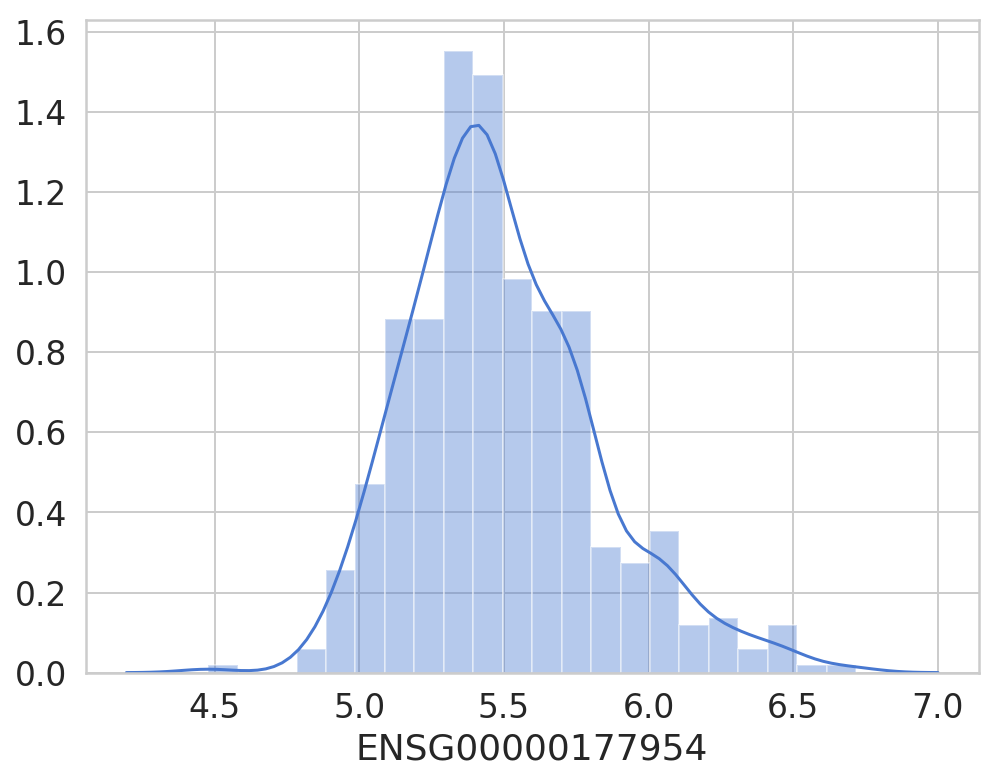

In [14]:
sns.distplot(np.log1p(df.ENSG00000177954));

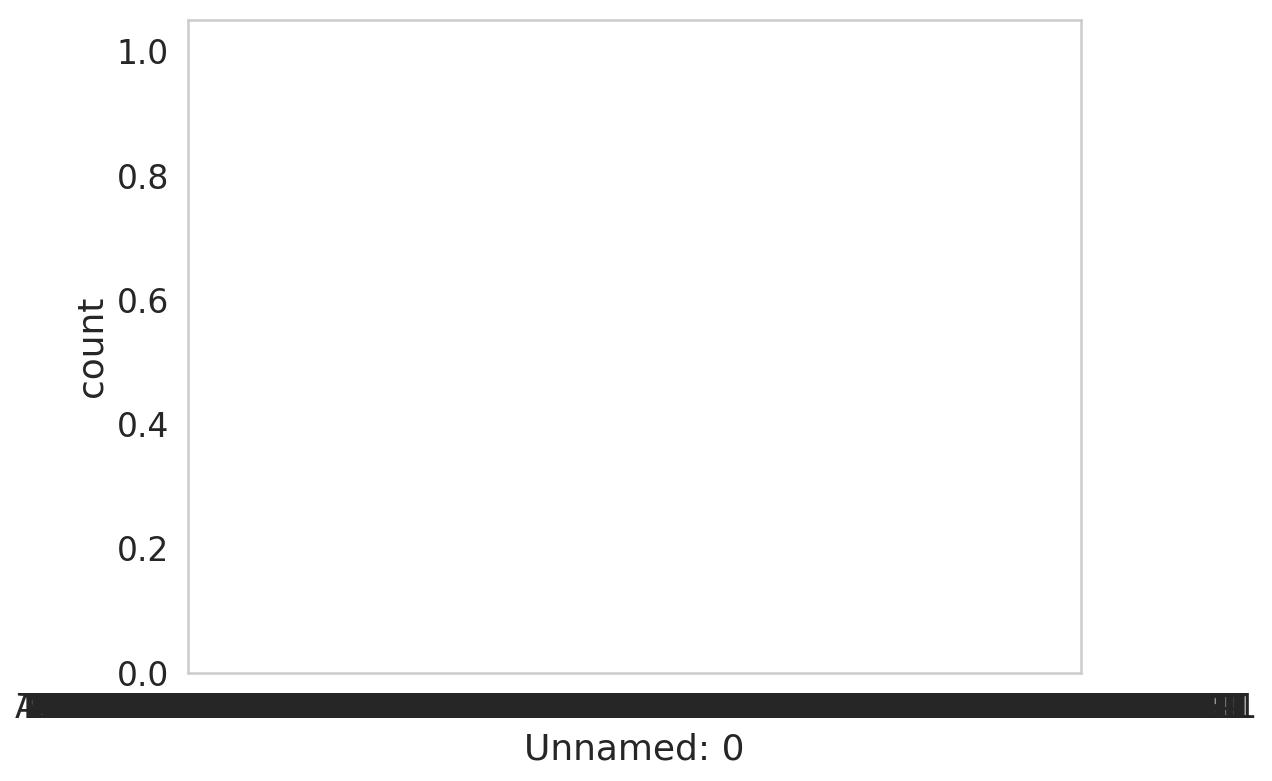

In [15]:
sns.countplot(x='Unnamed: 0', data=df);

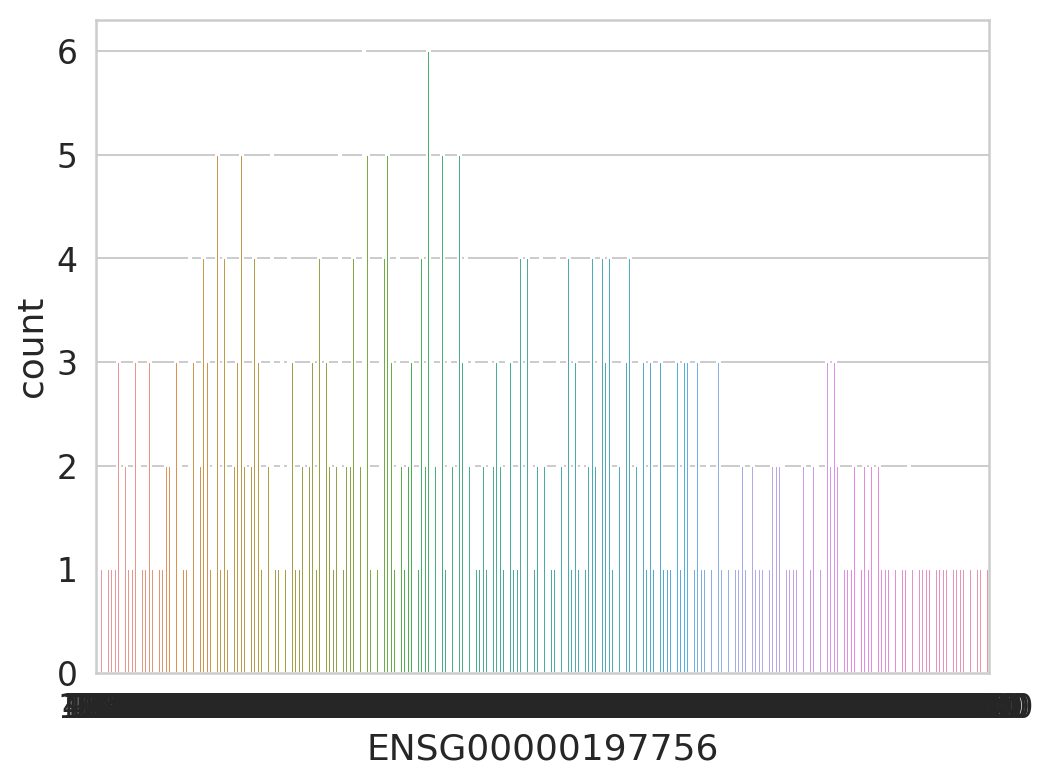

In [16]:
sns.countplot(x='ENSG00000197756', data=df);

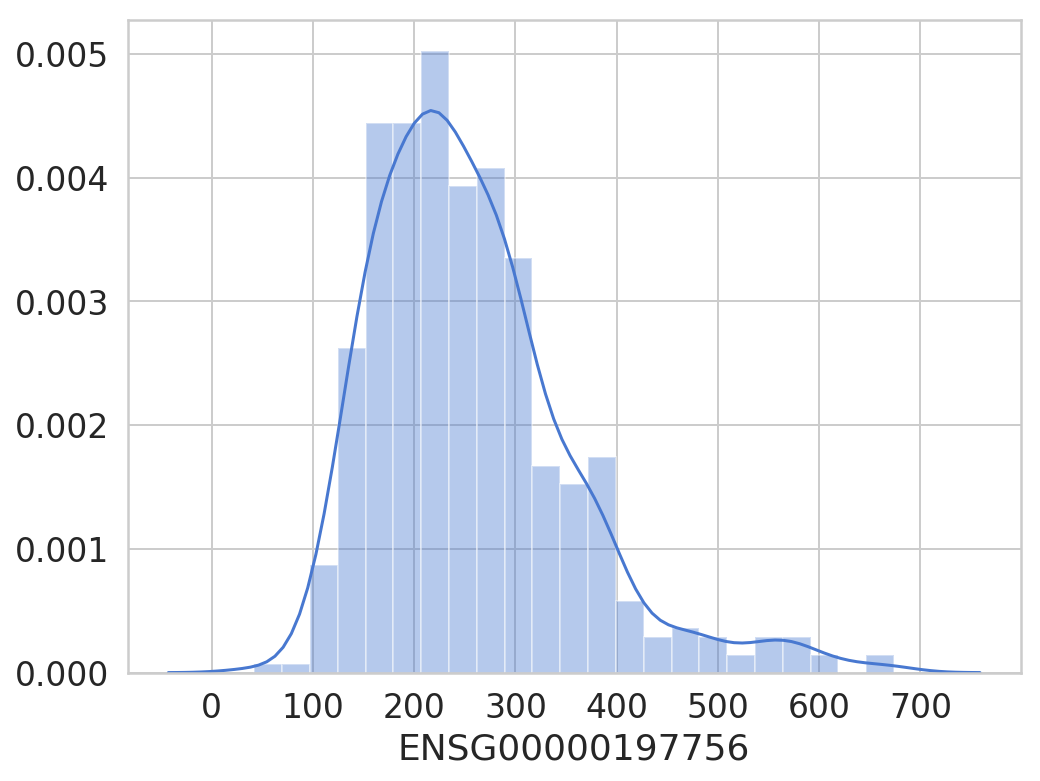

In [17]:
sns.distplot(df.ENSG00000197756);

In [18]:
corr_matrix = df.corr()

In [19]:
corr_matrix

,ENSG00000177954,ENSG00000197756,ENSG00000231500,ENSG00000140988,ENSG00000105372,ENSG00000198712,ENSG00000109475,ENSG00000112306,ENSG00000137818,ENSG00000115268,...,ENSG00000269858,ENSG00000182087,ENSG00000160214,ENSG00000166411,ENSG00000186153,ENSG00000089351,ENSG00000108433,ENSG00000206053,ENSG00000137806,ENSG00000197766
ENSG00000177954,1.000000,0.765914,0.795157,0.715283,0.855736,0.646341,0.653232,0.857135,0.812389,0.811844,...,0.105862,0.102781,0.040017,0.023280,0.079441,0.090609,0.048090,0.146617,0.060840,0.177601
ENSG00000197756,0.765914,1.000000,0.823399,0.697642,0.757539,0.383251,0.432227,0.774014,0.701896,0.799065,...,0.108089,0.104475,0.089434,0.090052,0.153040,0.135835,0.110299,0.181901,0.051941,0.136466
ENSG00000231500,0.795157,0.823399,1.000000,0.808072,0.816690,0.349218,0.414345,0.853762,0.790331,0.834374,...,0.129217,0.118452,0.116049,0.075341,0.103637,0.139540,0.073267,0.161118,0.101250,0.131862
ENSG00000140988,0.715283,0.697642,0.808072,1.000000,0.808984,0.332613,0.335548,0.821013,0.762533,0.791263,...,0.165965,0.118222,0.117452,0.107986,0.137229,0.210008,0.092639,0.187528,0.135628,0.203423
ENSG00000105372,0.855736,0.757539,0.816690,0.808984,1.000000,0.508153,0.441241,0.847287,0.849413,0.877389,...,0.154384,0.131385,0.112610,0.059566,0.110416,0.179234,0.107462,0.180878,0.080415,0.206611
ENSG00000198712,0.646341,0.383251,0.349218,0.332613,0.508153,1.000000,0.706681,0.443545,0.474280,0.390298,...,0.037639,0.046565,-0.080318,-0.023034,0.049847,-0.012310,0.057351,0.057334,-0.009239,0.139508
ENSG00000109475,0.653232,0.432227,0.414345,0.335548,0.441241,0.706681,1.000000,0.499366,0.441928,0.403674,...,0.032525,0.050604,-0.067606,0.011744,-0.046908,-0.008451,-0.038812,0.107199,0.000439,0.108576
ENSG00000112306,0.857135,0.774014,0.853762,0.821013,0.847287,0.443545,0.499366,1.000000,0.851825,0.812395,...,0.155616,0.119334,0.094587,0.076456,0.093196,0.138830,0.067745,0.142102,0.107573,0.164534
ENSG00000137818,0.812389,0.701896,0.790331,0.762533,0.849413,0.474280,0.441928,0.851825,1.000000,0.815375,...,0.194731,0.111808,0.091089,0.115019,0.079957,0.117691,0.072684,0.147617,0.161133,0.143146
ENSG00000115268,0.811844,0.799065,0.834374,0.791263,0.877389,0.390298,0.403674,0.812395,0.815375,1.000000,...,0.163402,0.113408,0.133699,0.121690,0.124478,0.146995,0.139004,0.176607,0.149557,0.156261


In [20]:
corrENSG00000177954 = corr_matrix['ENSG00000177954']
corrENSG00000177954.iloc[corrENSG00000177954.abs().argsort()]

ENSG00000136518    0.000157
ENSG00000166598   -0.000213
ENSG00000002549   -0.000309
ENSG00000145781   -0.000594
ENSG00000067334   -0.000712
ENSG00000134001    0.000750
ENSG00000008517   -0.000965
ENSG00000108344    0.001048
ENSG00000165304   -0.001119
ENSG00000145386   -0.001580
ENSG00000162517   -0.001677
ENSG00000100220   -0.001706
ENSG00000035499    0.001853
ENSG00000124784    0.001898
ENSG00000112245   -0.001909
ENSG00000133318   -0.002105
ENSG00000166794   -0.002173
ENSG00000153914   -0.002249
ENSG00000064102   -0.002381
ENSG00000135900    0.002549
ENSG00000213639    0.002602
ENSG00000168291    0.003465
ENSG00000138442   -0.003627
ENSG00000134153   -0.003711
ENSG00000197170    0.003846
ENSG00000109519   -0.003885
ENSG00000140259    0.004223
ENSG00000114054    0.004350
ENSG00000126261    0.004445
ENSG00000198898    0.004832
                     ...   
ENSG00000182899    0.780431
ENSG00000164587    0.784971
ENSG00000172809    0.787815
ENSG00000142676    0.791923
ENSG00000231500    0

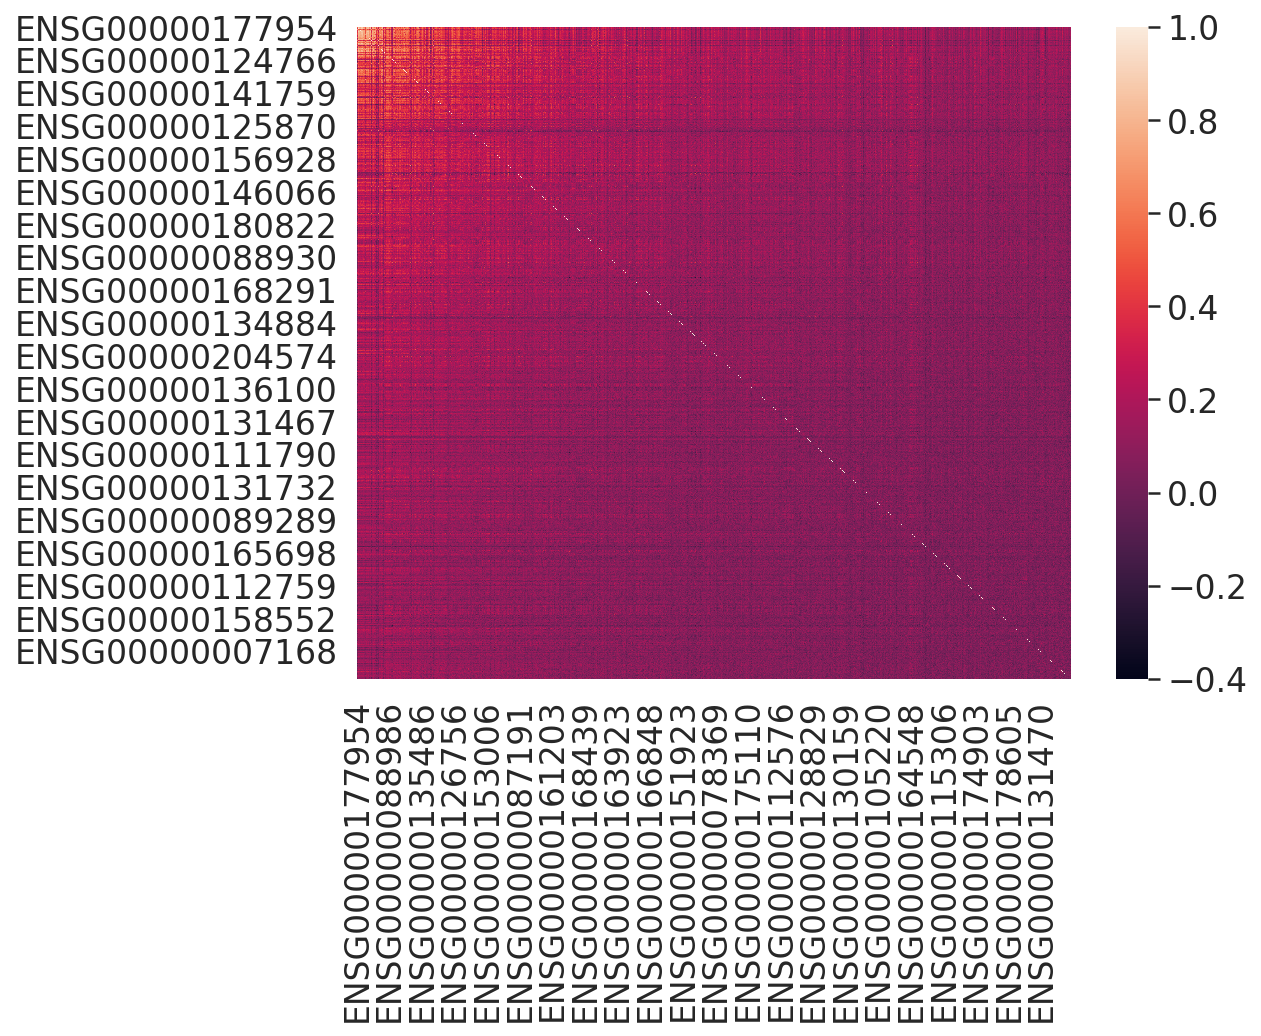

In [22]:
#palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(corr_matrix)#, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,square=True, linewidths=.5);

# Preprocessing




## Missing data?

In [21]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

## Remove unused columns!


In [26]:
df = df.drop(['id', 'name', 'host_id', 'host_name', 'reviews_per_month', 'last_review', 'neighbourhood'], axis=1)

In [27]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [28]:
df.columns

Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [29]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


## Predict log1p

In [30]:
X = df.drop('price', axis=1)
y = np.log1p(df.price.values)

## Feature scaling and One-hot encoding

In [31]:
from sklearn.preprocessing import OneHotEncoder

data = [['Manhattan'], ['Brooklyn']]

OneHotEncoder(sparse=False).fit_transform(data)

array([[0., 1.],
       [1., 0.]])

In [32]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (MinMaxScaler(), ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']),
    (OneHotEncoder(handle_unknown="ignore"), ['neighbourhood_group', 'room_type'])
)

In [33]:
transformer.fit(X)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['latitude', 'longitude', 'minimum_nights',
                                  'number_of_reviews',
                                  'calculated_host_listings_count',
                                  'availability_365']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['neighbourhood_group', 'room_type'])],
                  verbose=False)

In [34]:
X = transformer.transform(X)

## Split the training and test data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [36]:
X_train.shape

(39116, 14)

# Modeling

In [37]:
def plot_mse(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.plot(hist['epoch'], hist['mse'],
            label='Train MSE')
  plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val MSE')
  plt.legend()
  plt.show()

Train on 31292 samples, validate on 7824 samples
Epoch 1/100
31292/31292 [==============================] - 2s 55us/sample - loss: 8.6985 - mse: 8.6985 - val_loss: 0.5412 - val_mse: 0.5412
Epoch 2/100
31292/31292 [==============================] - 1s 41us/sample - loss: 2.3424 - mse: 2.3424 - val_loss: 0.4477 - val_mse: 0.4477
Epoch 3/100
31292/31292 [==============================] - 1s 42us/sample - loss: 2.1386 - mse: 2.1386 - val_loss: 0.4236 - val_mse: 0.4236
Epoch 4/100
31292/31292 [==============================] - 1s 38us/sample - loss: 1.9759 - mse: 1.9759 - val_loss: 0.4252 - val_mse: 0.4252
Epoch 5/100
31292/31292 [==============================] - 1s 39us/sample - loss: 1.9401 - mse: 1.9401 - val_loss: 0.4459 - val_mse: 0.4459
Epoch 6/100
31292/31292 [==============================] - 1s 41us/sample - loss: 1.8728 - mse: 1.8728 - val_loss: 0.4093 - val_mse: 0.4093
Epoch 7/100
31292/31292 [==============================] - 1s 41us/sample - loss: 1.7967 - mse: 1.7967 - val_lo

Epoch 59/100
31292/31292 [==============================] - 1s 40us/sample - loss: 0.3110 - mse: 0.3110 - val_loss: 0.2487 - val_mse: 0.2487
Epoch 60/100
31292/31292 [==============================] - 1s 41us/sample - loss: 0.3067 - mse: 0.3067 - val_loss: 0.2493 - val_mse: 0.2493
Epoch 61/100
31292/31292 [==============================] - 1s 40us/sample - loss: 0.3045 - mse: 0.3045 - val_loss: 0.2497 - val_mse: 0.2497
Epoch 62/100
31292/31292 [==============================] - 1s 39us/sample - loss: 0.3010 - mse: 0.3010 - val_loss: 0.2487 - val_mse: 0.2487
Epoch 63/100
31292/31292 [==============================] - 1s 42us/sample - loss: 0.2943 - mse: 0.2943 - val_loss: 0.2466 - val_mse: 0.2466
Epoch 64/100
31292/31292 [==============================] - 1s 39us/sample - loss: 0.2878 - mse: 0.2878 - val_loss: 0.2476 - val_mse: 0.2476
Epoch 65/100
31292/31292 [==============================] - 1s 40us/sample - loss: 0.2891 - mse: 0.2891 - val_loss: 0.2480 - val_mse: 0.2480
Epoch 66/100


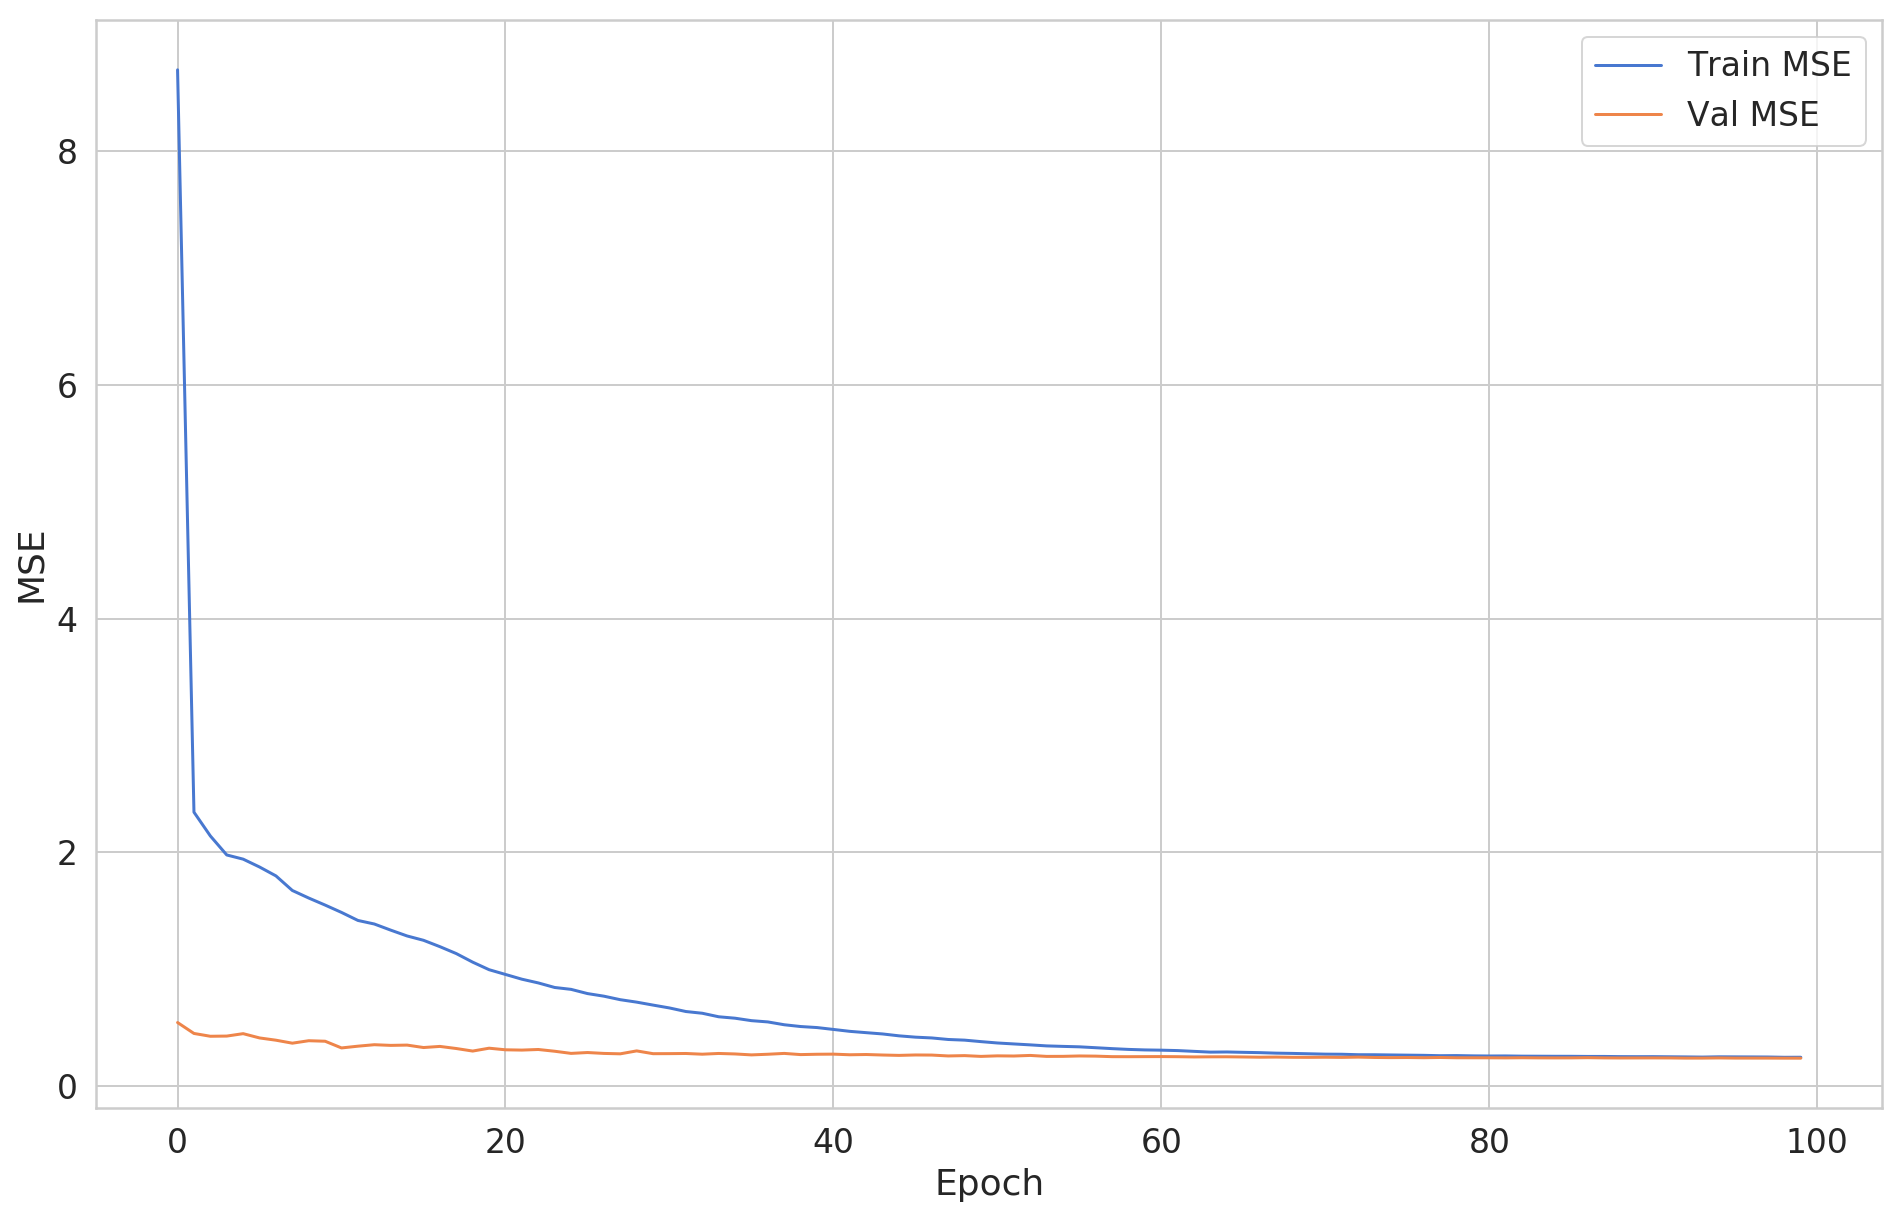

In [38]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=64, activation="relu", input_shape=[X_train.shape[1]]))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))

model.add(keras.layers.Dense(1))

model.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    loss = 'mse', 
    metrics = ['mse'])

BATCH_SIZE = 32

early_stop = keras.callbacks.EarlyStopping(
  monitor='val_mse',
  mode="min",
  patience=10
)

history = model.fit(
  x=X_train,
  y=y_train,
  shuffle=True,
  epochs=100,
  validation_split=0.2,
  batch_size=BATCH_SIZE,
  callbacks=[early_stop]
)

plot_mse(history)

# Evaluation

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [54]:
print(X_test.shape,y_test.shape)

(9779, 14) (9779,)


In [40]:
y_pred = model.predict(X_test)

In [42]:
print(mean_squared_error(y_test, y_pred))

0.21233864692177748


In [43]:
print(mean_absolute_error(y_test, y_pred))

0.3322096946409984


In [44]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.4608021776443526


In [45]:
print(r2_score(y_test, y_pred))

0.55116428363327


# Saving

In [46]:
joblib.dump(transformer, "data_transformer.joblib")
model.save("price_prediction_model.h5")

# Loading

In [47]:
from google.colab import files

ImportError: No module named 'google.colab'

In [48]:
files.download("data_transformer.joblib")
files.download("price_prediction_model.h5") 

NameError: name 'files' is not defined